<a href="https://colab.research.google.com/github/ddonggsa/project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.3 MB/s eta 0:00:00


1. 연도별 나이별 대로 독서율 구하기(종이책, 전자책)

In [ ]:
# 왼쪽 옆 파일 그림 선택한후, 사용할 파일을 paperbook.csv처럼 업로드 해주시고, 아래와 같이 불러서 사용해주시면 됩니다 ! 사용한 데이터 url도 함께 올려주세요 !
#https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1025544&conn_path=I2
df_paperbook = pd.read_csv("/content/paperbook.csv",
                 encoding="cp949")
df_paperbook.shape

(19, 17)

In [ ]:
df_paperbook

,통계분류(1),통계분류(2),2013,2013.1,2013.2,2015,2015.1,2015.2,2017,2017.1,2017.2,2019,2019.1,2019.2,2021,2021.1,2021.2
0,통계분류(1),통계분류(2),사례수,안읽음,일반도서,사례수,안읽음,일반도서,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음
1,전체,소계,2000,28.6,71.4,5000,34.7,65.3,6000,59.9,40.1,6000,52.1,47.9,6000,40.7,59.3
2,성별,남성,993,29.7,70.3,2478,34.5,65.5,2988,58.2,41.8,2990,50.4,49.6,2991,40.4,59.6
3,성별,여성,1007,27.6,72.4,2522,34.8,65.2,3012,61.5,38.5,3010,53.9,46.1,3009,41.1,58.9
4,연령별,20대 이하,387,11.8,88.2,-,-,-,-,-,-,-,-,-,-,-,-
5,연령별,19~29세,-,-,-,911,13.4,86.6,1070,73.5,26.5,1057,70.4,29.6,1016,60.3,39.7
6,연령별,30~39세,389,17.9,82.1,932,22.9,77.1,1071,68.9,31.1,1022,68.7,31.3,964,56.3,43.7
7,연령별,40~49세,425,22.6,77.4,1030,27.8,72.2,1218,61.9,38.1,1158,57.6,42.4,1123,44.4,55.6
8,연령별,50~59세,385,38.3,61.7,988,39.8,60.2,1190,52.2,47.8,1192,43.5,56.5,1173,33.9,66.1
9,연령별,60세 이상,414,51.6,48.4,1140,63.1,36.9,1451,47.8,52.2,1571,31.5,68.5,1724,22.7,77.3


In [ ]:
#column 이름 변경
df_paperbook.rename(columns={'2013.1' : '2013X'},inplace = True)
df_paperbook.rename(columns={'2013.2' : '2013O'},inplace = True)
df_paperbook.rename(columns={'2015.1' : '2015X'},inplace = True)
df_paperbook.rename(columns={'2015.2' : '2015O'},inplace = True)
df_paperbook.rename(columns={'2017.1' : '2017O'},inplace = True)
df_paperbook.rename(columns={'2017.2' : '2017X'},inplace = True)
df_paperbook.rename(columns={'2019.1' : '2019O'},inplace = True)
df_paperbook.rename(columns={'2019.2' : '2019X'},inplace = True)
df_paperbook.rename(columns={'2021.1' : '2021O'},inplace = True)
df_paperbook.rename(columns={'2021.2' : '2021X'},inplace = True)
df_paperbook.rename(columns={'통계분류(2)' : '연령대'},inplace = True)
df_paperbook.rename(columns={'통계분류(1)' : '통계분류'},inplace = True)
df_paperbook

,통계분류,연령대,2013,2013X,2013O,2015,2015X,2015O,2017,2017O,2017X,2019,2019O,2019X,2021,2021O,2021X
0,통계분류(1),통계분류(2),사례수,안읽음,일반도서,사례수,안읽음,일반도서,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음
1,전체,소계,2000,28.6,71.4,5000,34.7,65.3,6000,59.9,40.1,6000,52.1,47.9,6000,40.7,59.3
2,성별,남성,993,29.7,70.3,2478,34.5,65.5,2988,58.2,41.8,2990,50.4,49.6,2991,40.4,59.6
3,성별,여성,1007,27.6,72.4,2522,34.8,65.2,3012,61.5,38.5,3010,53.9,46.1,3009,41.1,58.9
4,연령별,20대 이하,387,11.8,88.2,-,-,-,-,-,-,-,-,-,-,-,-
5,연령별,19~29세,-,-,-,911,13.4,86.6,1070,73.5,26.5,1057,70.4,29.6,1016,60.3,39.7
6,연령별,30~39세,389,17.9,82.1,932,22.9,77.1,1071,68.9,31.1,1022,68.7,31.3,964,56.3,43.7
7,연령별,40~49세,425,22.6,77.4,1030,27.8,72.2,1218,61.9,38.1,1158,57.6,42.4,1123,44.4,55.6
8,연령별,50~59세,385,38.3,61.7,988,39.8,60.2,1190,52.2,47.8,1192,43.5,56.5,1173,33.9,66.1
9,연령별,60세 이상,414,51.6,48.4,1140,63.1,36.9,1451,47.8,52.2,1571,31.5,68.5,1724,22.7,77.3


In [ ]:
#연령별로만 자료 따로 분리 
df_paperbook_age = df_paperbook[df_paperbook['통계분류'] == "연령별"].copy()
df_paperbook_age

,통계분류,연령대,2013,2013X,2013O,2015,2015X,2015O,2017,2017O,2017X,2019,2019O,2019X,2021,2021O,2021X
4,연령별,20대 이하,387,11.8,88.2,-,-,-,-,-,-,-,-,-,-,-,-
5,연령별,19~29세,-,-,-,911,13.4,86.6,1070,73.5,26.5,1057,70.4,29.6,1016,60.3,39.7
6,연령별,30~39세,389,17.9,82.1,932,22.9,77.1,1071,68.9,31.1,1022,68.7,31.3,964,56.3,43.7
7,연령별,40~49세,425,22.6,77.4,1030,27.8,72.2,1218,61.9,38.1,1158,57.6,42.4,1123,44.4,55.6
8,연령별,50~59세,385,38.3,61.7,988,39.8,60.2,1190,52.2,47.8,1192,43.5,56.5,1173,33.9,66.1
9,연령별,60세 이상,414,51.6,48.4,1140,63.1,36.9,1451,47.8,52.2,1571,31.5,68.5,1724,22.7,77.3


In [ ]:
# hue 를 연령대로 구하기 위해, 년도별로 데이터를 분리한 후 합쳐준다.
df_paperbook_2013 = df_paperbook_age.iloc[[0,1,2,3,4,5],[0,1,4,3]]
df_paperbook_2015 = df_paperbook_age.iloc[[0,1,2,3,4,5],[0,1,7,6]]
df_paperbook_2017 = df_paperbook_age.iloc[[0,1,2,3,4,5],[0,1,9,10]]
df_paperbook_2019 = df_paperbook_age.iloc[[0,1,2,3,4,5],[0,1,12,13]]
df_paperbook_2021 = df_paperbook_age.iloc[[0,1,2,3,4,5],[0,1,15,16]]

df_paperbook_2013.rename(columns = {"2013O":"O"},inplace = True)
df_paperbook_2013.rename(columns = {"2013X":"X"},inplace = True)
df_paperbook_2015.rename(columns = {"2015O":"O"},inplace = True)
df_paperbook_2015.rename(columns = {"2015X":"X"},inplace = True)
df_paperbook_2017.rename(columns = {"2017O":"O"},inplace = True)
df_paperbook_2017.rename(columns = {"2017X":"X"},inplace = True)
df_paperbook_2019.rename(columns = {"2019O":"O"},inplace = True)
df_paperbook_2019.rename(columns = {"2019X":"X"},inplace = True)
df_paperbook_2021.rename(columns = {"2021O":"O"},inplace = True)
df_paperbook_2021.rename(columns = {"2021X":"X"},inplace = True)

df_paperbook_2013['년도'] = '2013'
df_paperbook_2015['년도'] = '2015'
df_paperbook_2017['년도'] = '2017'
df_paperbook_2019['년도'] = '2019'
df_paperbook_2021['년도'] = '2021'
df_paperbook_new = pd.concat([df_paperbook_2013,df_paperbook_2015,df_paperbook_2017,df_paperbook_2019,df_paperbook_2021],ignore_index=True)
df_paperbook_new

,통계분류,연령대,O,X,년도
0,연령별,20대 이하,88.2,11.8,2013
1,연령별,19~29세,-,-,2013
2,연령별,30~39세,82.1,17.9,2013
3,연령별,40~49세,77.4,22.6,2013
4,연령별,50~59세,61.7,38.3,2013
5,연령별,60세 이상,48.4,51.6,2013
6,연령별,20대 이하,-,-,2015
7,연령별,19~29세,86.6,13.4,2015
8,연령별,30~39세,77.1,22.9,2015
9,연령별,40~49세,72.2,27.8,2015


In [ ]:
#데이터를 그래프로 나타내기위해 object형 데이터를 numeric 형인 float으로 변형시켜줌
df_paperbook_new[['O','X','년도']] = df_paperbook_new[['O','X','년도']] .apply(pd.to_numeric, errors = 'coerce')
df_paperbook_new.dtypes

통계분류     object
연령대      object
O       float64
X       float64
년도        int64
dtype: object

Text(0.5, 1.0, '년도별, 연령별 종이책을 읽는 비율')

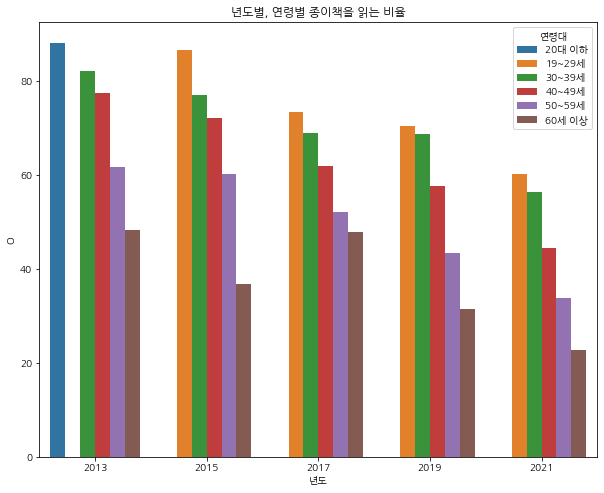

In [ ]:
# O , 년도별, 연령별 종이책을 읽는 비율
plt.figure(figsize=(10,8))
sns.barplot(data= df_paperbook_new, x= "년도",y = "O",hue = "연령대")
plt.title('년도별, 연령별 종이책을 읽는 비율')

Text(0.5, 1.0, '년도별, 연령별 종이책을 안읽는 비율')

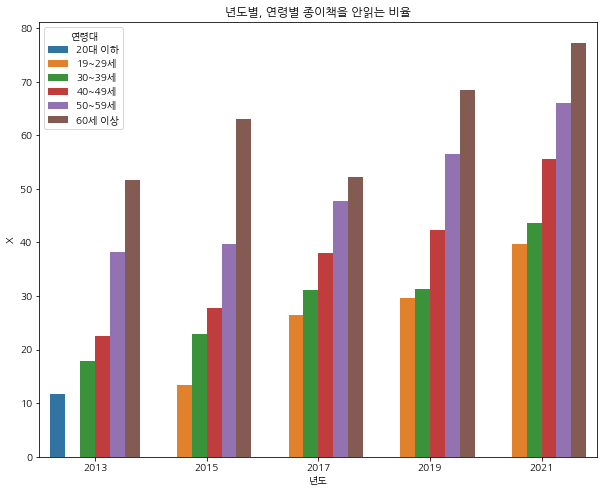

In [ ]:
# X , 년도별, 연령별 종이책을 안읽는 비율
plt.figure(figsize=(10,8))
sns.barplot(data= df_paperbook_new, x= "년도",y = "X",hue = "연령대")
plt.title('년도별, 연령별 종이책을 안읽는 비율')


**종이책을 읽는 비율은 거의 모든 연령층에서 시간이 지날수록 감소하고, 
종이책을 안읽는 비율은 거의 모든 연령층에서 시간이 지날수록 증가한다.(60세 이상 제외)**

In [ ]:
#https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1025545&conn_path=I2
df_elecbook = pd.read_csv("/content/elecbook.csv",
                 encoding="cp949")
df_elecbook.shape

(19, 17)

In [ ]:
df_elecbook

,통계분류(1),통계분류(2),2013,2013.1,2013.2,2015,2015.1,2015.2,2017,2017.1,2017.2,2019,2019.1,2019.2,2021,2021.1,2021.2
0,통계분류(1),통계분류(2),사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음
1,전체,소계,2000,13.9,86.1,5000,10.2,89.8,6000,14.1,85.9,6000,16.5,83.5,6000,19,81
2,성별,남성,993,14.7,85.3,2478,11.6,88.4,2988,15.8,84.2,2990,17.9,82.1,2991,20.1,79.9
3,성별,여성,1007,13.1,86.9,2522,8.8,91.2,3012,12.3,87.7,3010,15.1,84.9,3009,17.9,82.1
4,연령별,20대 이하,387,31.3,68.7,-,-,-,-,-,-,-,-,-,-,-,-
5,연령별,19~29세,-,-,-,911,27.8,72.2,1070,34.7,65.3,1057,39,61,1016,50.5,49.5
6,연령별,30~39세,389,21.3,78.7,932,14.2,85.8,1071,22.7,77.3,1022,31.3,68.7,964,38.4,61.6
7,연령별,40~49세,425,11,89,1030,7.7,92.3,1218,13.8,86.2,1158,14.4,85.6,1123,13.8,86.2
8,연령별,50~59세,385,4.5,95.5,988,3.5,96.5,1190,3.5,96.5,1192,4.9,95.1,1173,5.2,94.8
9,연령별,60세 이상,414,2.5,97.5,1140,1,99,1451,1.3,98.7,1571,2,98,1724,2.3,97.7


In [ ]:
#연령별로만 자료 따로 분리 
df_elecbook_age = df_elecbook[df_elecbook['통계분류(1)'] == "연령별"].copy()
df_elecbook_age

,통계분류(1),통계분류(2),2013,2013.1,2013.2,2015,2015.1,2015.2,2017,2017.1,2017.2,2019,2019.1,2019.2,2021,2021.1,2021.2
4,연령별,20대 이하,387,31.3,68.7,-,-,-,-,-,-,-,-,-,-,-,-
5,연령별,19~29세,-,-,-,911,27.8,72.2,1070,34.7,65.3,1057,39,61,1016,50.5,49.5
6,연령별,30~39세,389,21.3,78.7,932,14.2,85.8,1071,22.7,77.3,1022,31.3,68.7,964,38.4,61.6
7,연령별,40~49세,425,11,89,1030,7.7,92.3,1218,13.8,86.2,1158,14.4,85.6,1123,13.8,86.2
8,연령별,50~59세,385,4.5,95.5,988,3.5,96.5,1190,3.5,96.5,1192,4.9,95.1,1173,5.2,94.8
9,연령별,60세 이상,414,2.5,97.5,1140,1,99,1451,1.3,98.7,1571,2,98,1724,2.3,97.7


In [ ]:
#column 이름 변경
df_elecbook_age.rename(columns={'2013.1' : '2013O'},inplace = True)
df_elecbook_age.rename(columns={'2013.2' : '2013X'},inplace = True)
df_elecbook_age.rename(columns={'2015.1' : '2015O'},inplace = True)
df_elecbook_age.rename(columns={'2015.2' : '2015X'},inplace = True)
df_elecbook_age.rename(columns={'2017.1' : '2017O'},inplace = True)
df_elecbook_age.rename(columns={'2017.2' : '2017X'},inplace = True)
df_elecbook_age.rename(columns={'2019.1' : '2019O'},inplace = True)
df_elecbook_age.rename(columns={'2019.2' : '2019X'},inplace = True)
df_elecbook_age.rename(columns={'2021.1' : '2021O'},inplace = True)
df_elecbook_age.rename(columns={'2021.2' : '2021X'},inplace = True)
df_elecbook_age.rename(columns={'통계분류(2)' : '연령대'},inplace = True)
df_elecbook_age.rename(columns={'통계분류(1)' : '통계분류'},inplace = True)
df_elecbook_age

,통계분류,연령대,2013,2013O,2013X,2015,2015O,2015X,2017,2017O,2017X,2019,2019O,2019X,2021,2021O,2021X
4,연령별,20대 이하,387,31.3,68.7,-,-,-,-,-,-,-,-,-,-,-,-
5,연령별,19~29세,-,-,-,911,27.8,72.2,1070,34.7,65.3,1057,39,61,1016,50.5,49.5
6,연령별,30~39세,389,21.3,78.7,932,14.2,85.8,1071,22.7,77.3,1022,31.3,68.7,964,38.4,61.6
7,연령별,40~49세,425,11,89,1030,7.7,92.3,1218,13.8,86.2,1158,14.4,85.6,1123,13.8,86.2
8,연령별,50~59세,385,4.5,95.5,988,3.5,96.5,1190,3.5,96.5,1192,4.9,95.1,1173,5.2,94.8
9,연령별,60세 이상,414,2.5,97.5,1140,1,99,1451,1.3,98.7,1571,2,98,1724,2.3,97.7


In [ ]:
# hue 를 연령대로 구하기 위해, 년도별로 데이터를 분리한 후 합쳐준다.
df_elecbook_2013 = df_elecbook_age.iloc[[0,1,2,3,4,5],[0,1,3,4]]
df_elecbook_2015 = df_elecbook_age.iloc[[0,1,2,3,4,5],[0,1,6,7]]
df_elecbook_2017 = df_elecbook_age.iloc[[0,1,2,3,4,5],[0,1,9,10]]
df_elecbook_2019 = df_elecbook_age.iloc[[0,1,2,3,4,5],[0,1,12,13]]
df_elecbook_2021 = df_elecbook_age.iloc[[0,1,2,3,4,5],[0,1,15,16]]

df_elecbook_2013.rename(columns = {"2013O":"O"},inplace = True)
df_elecbook_2013.rename(columns = {"2013X":"X"},inplace = True)
df_elecbook_2015.rename(columns = {"2015O":"O"},inplace = True)
df_elecbook_2015.rename(columns = {"2015X":"X"},inplace = True)
df_elecbook_2017.rename(columns = {"2017O":"O"},inplace = True)
df_elecbook_2017.rename(columns = {"2017X":"X"},inplace = True)
df_elecbook_2019.rename(columns = {"2019O":"O"},inplace = True)
df_elecbook_2019.rename(columns = {"2019X":"X"},inplace = True)
df_elecbook_2021.rename(columns = {"2021O":"O"},inplace = True)
df_elecbook_2021.rename(columns = {"2021X":"X"},inplace = True)

df_elecbook_2013['년도'] = '2013'
df_elecbook_2015['년도'] = '2015'
df_elecbook_2017['년도'] = '2017'
df_elecbook_2019['년도'] = '2019'
df_elecbook_2021['년도'] = '2021'
df_elecbook_new = pd.concat([df_elecbook_2013,df_elecbook_2015,df_elecbook_2017,df_elecbook_2019,df_elecbook_2021],ignore_index=True)
df_elecbook_new

,통계분류,연령대,O,X,년도
0,연령별,20대 이하,31.3,68.7,2013
1,연령별,19~29세,-,-,2013
2,연령별,30~39세,21.3,78.7,2013
3,연령별,40~49세,11,89,2013
4,연령별,50~59세,4.5,95.5,2013
5,연령별,60세 이상,2.5,97.5,2013
6,연령별,20대 이하,-,-,2015
7,연령별,19~29세,27.8,72.2,2015
8,연령별,30~39세,14.2,85.8,2015
9,연령별,40~49세,7.7,92.3,2015


In [ ]:
#데이터를 그래프로 나타내기위해 object형 데이터를 numeric 형인 float으로 변형시켜줌
df_elecbook_new[['O','X','년도']] = df_elecbook_new[['O','X','년도']] .apply(pd.to_numeric, errors = 'coerce')
df_elecbook_new.dtypes

통계분류     object
연령대      object
O       float64
X       float64
년도        int64
dtype: object

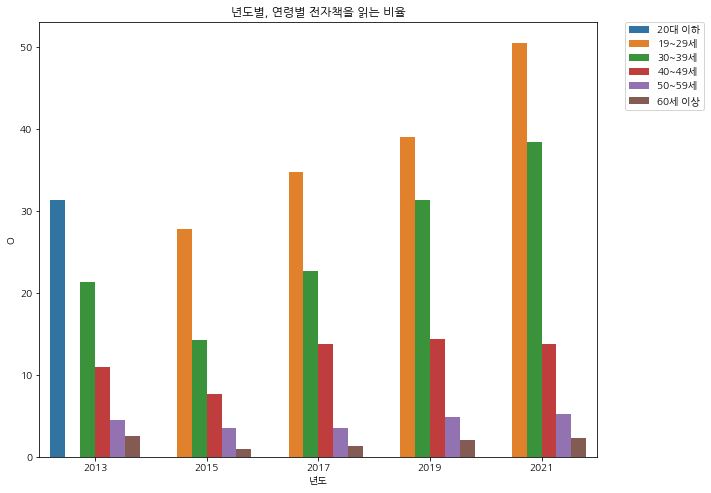

In [ ]:
# 년도별, 연령별 전자책을 읽는 비율
plt.figure(figsize=(10,8))
sns.barplot(data= df_elecbook_new ,x= "년도",y = "O",hue = "연령대")
plt.title('년도별, 연령별 전자책을 읽는 비율')
plt.legend(bbox_to_anchor = (1.05,1),loc = 2,borderaxespad = 0.)

**약간의 감소세가 보인 해(2013-2015)가 있긴 하지만, 결과적으로 증가하고 있다는 것을 알 수 있다.**

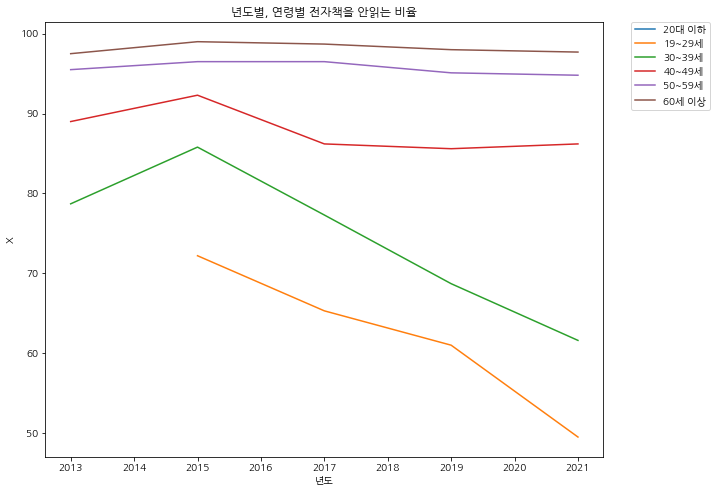

In [ ]:
# X , 년도별, 연령별 전자책을 안읽는 비율 , barplotr으로 나타내면 증감이 뚜렷하게 보이지않아 lineplot으로 나타내었습니다. 
plt.figure(figsize=(10,8))
sns.lineplot(data= df_elecbook_new, x= "년도",y = "X",hue = "연령대")
plt.title('년도별, 연령별 전자책을 안읽는 비율')
plt.legend(bbox_to_anchor = (1.05,1),loc = 2,borderaxespad = 0.)

**전자책을 읽는 비율이 늘어났기 때문에 읽지않는 비율은 감소함을 볼 수 있다.**


연도별, 나이대별로 유투브/sns 이용량 분석

https://kosis.kr/statHtml/statHtml.do?orgId=127&tblId=DT_120019N_2016_004&conn_path=I2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.0 MB/s eta 0:00:00


In [ ]:
df_sns = pd.read_csv("/content/sns_연령별.csv", encoding = "cp949")
df_sns.shape

(6, 50)

In [ ]:
df_sns

,응답자특성별(1),응답자특성별(2),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2020.6,2020.7,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,응답자특성별(1),응답자특성별(2),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),...,SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등)
1,응답자특성별(1),응답자특성별(2),전혀 이용하지 않는다 (%),거의 이용하지 않는다 (%),별로 이용하지 않는다 (%),보통 (%),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점),...,매우 자주 이용한다 (%),7점만점 (점),전혀 이용하지 않는다 (%),거의 이용하지 않는다 (%),별로 이용하지 않는다 (%),보통 (%),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점)
2,연령대별,유아동(만3~9세),0.9,14.1,35.9,16.5,11.0,13.1,8.6,3.96,...,1.2,4.12,14.7,12.4,8.9,21.1,19.5,15.8,7.6,3.96
3,연령대별,청소년(만10~19세),2.0,4.4,16.7,22.1,25.4,19.6,9.9,4.63,...,12.8,4.81,1.5,5.1,8.4,15.9,25.5,24.9,18.6,5.08
4,연령대별,성인(만20~59세),2.2,4.0,12.0,23.4,24.6,22.6,11.2,4.77,...,11.2,4.67,0.9,3.6,8.3,17.4,28.5,25.0,16.3,5.09
5,연령대별,60대(만60~69세),2.9,5.8,15.4,24.6,21.9,20.2,9.2,4.54,...,3.7,4.14,3.7,6.9,12.8,21.8,24.5,19.5,10.8,4.58


In [ ]:
df_sns.rename(columns = {"응답자특성별(2)" : "연령대"}, inplace = True)

In [ ]:
df_sns.drop(["2016", "2016.1", "2016.2", "2016.3",
            "2017", "2017.1", "2017.2", "2017.3", 
            "2018", "2018.1", "2018.2", "2018.3",
            "2019", "2019.1", "2019.2", "2019.3",
            "2020", "2020.1", "2020.2", "2020.3", 
            "2021", "2021.1", "2021.2", "2021.3"], axis = 1)

,응답자특성별(1),연령대,2016.4,2016.5,2016.6,2016.7,2017.4,2017.5,2017.6,2017.7,...,2019.6,2019.7,2020.4,2020.5,2020.6,2020.7,2021.4,2021.5,2021.6,2021.7
0,응답자특성별(1),응답자특성별(2),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),...,SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등)
1,응답자특성별(1),응답자특성별(2),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점),...,매우 자주 이용한다 (%),7점만점 (점),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점)
2,연령대별,유아동(만3~9세),11.0,13.1,8.6,3.96,19.9,11.2,7.7,4.06,...,12.5,4.55,3.1,2.7,1.2,4.12,19.5,15.8,7.6,3.96
3,연령대별,청소년(만10~19세),25.4,19.6,9.9,4.63,27.7,21.1,11.4,4.75,...,17.5,4.93,16.9,16.7,12.8,4.81,25.5,24.9,18.6,5.08
4,연령대별,성인(만20~59세),24.6,22.6,11.2,4.77,28.2,21.5,9.8,4.73,...,9.8,4.55,20.8,17.1,11.2,4.67,28.5,25.0,16.3,5.09
5,연령대별,60대(만60~69세),21.9,20.2,9.2,4.54,26.2,17.9,6.4,4.43,...,4.0,3.97,10.1,8.6,3.7,4.14,24.5,19.5,10.8,4.58


In [ ]:
df_sns_2016 = df_sns[["연령대", "2016.4", "2016.5", "2016.6", "2016.7"]]
df_sns_2016

,연령대,2016.4,2016.5,2016.6,2016.7
0,응답자특성별(2),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등),SNS(카카오스토리 밴드 인스타그램 페이스북 블로그 등)
1,응답자특성별(2),어느 정도 이용한다 (%),자주 이용한다 (%),매우 자주 이용한다 (%),7점만점 (점)
2,유아동(만3~9세),11.0,13.1,8.6,3.96
3,청소년(만10~19세),25.4,19.6,9.9,4.63
4,성인(만20~59세),24.6,22.6,11.2,4.77
5,60대(만60~69세),21.9,20.2,9.2,4.54


In [ ]:
df_sns_2016_num = df_sns_2016.drop([df_sns_2016.index[0],
                                   df_sns_2016.index[1]])
df_sns_2016_num

,연령대,2016.4,2016.5,2016.6,2016.7
2,유아동(만3~9세),11.0,13.1,8.6,3.96
3,청소년(만10~19세),25.4,19.6,9.9,4.63
4,성인(만20~59세),24.6,22.6,11.2,4.77
5,60대(만60~69세),21.9,20.2,9.2,4.54


In [ ]:
df_sns_2017 = df_sns[["연령대", "2017.4", "2017.5", "2017.6", "2017.7"]]
df_sns_2017_num = df_sns_2017.drop([df_sns_2017.index[0],
                                   df_sns_2017.index[1]])

df_sns_2018 = df_sns[["연령대", "2018.4", "2018.5", "2018.6", "2018.7"]]
df_sns_2018_num = df_sns_2018.drop([df_sns_2018.index[0],
                                   df_sns_2018.index[1]])

df_sns_2019 = df_sns[["연령대", "2019.4", "2019.5", "2019.6", "2019.7"]]
df_sns_2019_num = df_sns_2019.drop([df_sns_2019.index[0],
                                   df_sns_2019.index[1]])

df_sns_2020 = df_sns[["연령대", "2020.4", "2020.5", "2020.6", "2020.7"]]
df_sns_2020_num = df_sns_2020.drop([df_sns_2020.index[0],
                                   df_sns_2020.index[1]])

df_sns_2021 = df_sns[["연령대", "2021.4", "2021.5", "2021.6", "2021.7"]]
df_sns_2021_num = df_sns_2021.drop([df_sns_2021.index[0],
                                   df_sns_2021.index[1]])

df_sns_2017_num

,연령대,2017.4,2017.5,2017.6,2017.7
2,유아동(만3~9세),19.9,11.2,7.7,4.06
3,청소년(만10~19세),27.7,21.1,11.4,4.75
4,성인(만20~59세),28.2,21.5,9.8,4.73
5,60대(만60~69세),26.2,17.9,6.4,4.43


In [ ]:
df_sns_2016_num[["2016.4", "2016.5", "2016.6", "2016.7"]] = df_sns_2016_num[["2016.4", "2016.5", "2016.6", "2016.7"]].apply(pd.to_numeric)
df_sns_2016_num.dtypes

연령대        object
2016.4    float64
2016.5    float64
2016.6    float64
2016.7    float64
dtype: object

In [ ]:
df_sns_2016_num['sns 이용률'] = df_sns_2016_num.sum(axis=1)
df_sns_2016_num

<ipython-input-19-ac486ee015c8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2016_num['sns 이용률'] = df_sns_2016_num.sum(axis=1)


,연령대,2016.4,2016.5,2016.6,2016.7,sns 이용률
2,유아동(만3~9세),11.0,13.1,8.6,3.96,36.66
3,청소년(만10~19세),25.4,19.6,9.9,4.63,59.53
4,성인(만20~59세),24.6,22.6,11.2,4.77,63.17
5,60대(만60~69세),21.9,20.2,9.2,4.54,55.84


In [ ]:
df_sns_2017_num[["2017.4", "2017.5", "2017.6", "2017.7"]] = df_sns_2017_num[["2017.4", "2017.5", "2017.6", "2017.7"]].apply(pd.to_numeric)
df_sns_2017_num['sns 이용률'] = df_sns_2017_num.sum(axis=1)
df_sns_2018_num[["2018.4", "2018.5", "2018.6", "2018.7"]] = df_sns_2018_num[["2018.4", "2018.5", "2018.6", "2018.7"]].apply(pd.to_numeric)
df_sns_2018_num['sns 이용률'] = df_sns_2018_num.sum(axis=1)
df_sns_2019_num[["2019.4", "2019.5", "2019.6", "2019.7"]] = df_sns_2019_num[["2019.4", "2019.5", "2019.6", "2019.7"]].apply(pd.to_numeric)
df_sns_2019_num['sns 이용률'] = df_sns_2019_num.sum(axis=1)
df_sns_2020_num[["2020.4", "2020.5", "2020.6", "2020.7"]] = df_sns_2020_num[["2020.4", "2020.5", "2020.6", "2020.7"]].apply(pd.to_numeric)
df_sns_2020_num['sns 이용률'] = df_sns_2020_num.sum(axis=1)
df_sns_2021_num[["2021.4", "2021.5", "2021.6", "2021.7"]] = df_sns_2021_num[["2021.4", "2021.5", "2021.6", "2021.7"]].apply(pd.to_numeric)
df_sns_2021_num['sns 이용률'] = df_sns_2021_num.sum(axis=1)

df_sns_2017_num

<ipython-input-36-04c497f22b8f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2017_num['sns 이용률'] = df_sns_2017_num.sum(axis=1)
<ipython-input-36-04c497f22b8f>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2018_num['sns 이용률'] = df_sns_2018_num.sum(axis=1)
<ipython-input-36-04c497f22b8f>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2019_num['sns 이용률'] = df_sns_2019_num.sum(axis=1)
<ipython-input-36-04c497f22b8f>:8: FutureWarning: Dropping of nuisance colum

,연령대,2017.4,2017.5,2017.6,2017.7,sns 이용률
2,유아동(만3~9세),19.9,11.2,7.7,4.06,42.86
3,청소년(만10~19세),27.7,21.1,11.4,4.75,64.95
4,성인(만20~59세),28.2,21.5,9.8,4.73,64.23
5,60대(만60~69세),26.2,17.9,6.4,4.43,54.93


In [ ]:
df_2016_final = df_sns_2016_num.drop(["2016.4", "2016.5",
                                         "2016.6", "2016.7"], axis = 1)
df_2016_final['연도'] = [2016, 2016,2016, 2016]
df_2017_final = df_sns_2017_num.drop([ "2017.4", "2017.5",
                                         "2017.6", "2017.7"], axis = 1)
df_2017_final['연도'] = [2017, 2017, 2017, 2017]
df_2018_final = df_sns_2018_num.drop(["2018.4", "2018.5",
                                         "2018.6", "2018.7"], axis = 1)
df_2018_final['연도'] = [2018, 2018, 2018, 2018]
df_2019_final = df_sns_2019_num.drop(["2019.4", "2019.5",
                                         "2019.6", "2019.7"], axis = 1)
df_2019_final['연도'] = [2019, 2019, 2019, 2019]
df_2020_final = df_sns_2020_num.drop(["2020.4", "2020.5",
                                         "2020.6", "2020.7"], axis = 1)
df_2020_final['연도'] = [2020, 2020, 2020, 2020]
df_2021_final = df_sns_2021_num.drop(["2021.4", "2021.5",
                                         "2021.6", "2021.7"], axis = 1)
df_2021_final['연도'] = [2021, 2021, 2021, 2021]

df_2017_final

,연령대,sns 이용률,연도
2,유아동(만3~9세),42.86,2017
3,청소년(만10~19세),64.95,2017
4,성인(만20~59세),64.23,2017
5,60대(만60~69세),54.93,2017


In [ ]:
df_sns_2016_mean = df_2016_final.copy()
df_sns_2016_mean.loc['평균'] = df_2016_final.mean(axis=0)
df_sns_2017_mean = df_2017_final.copy()
df_sns_2017_mean.loc['평균'] = df_2017_final.mean(axis=0)
df_sns_2018_mean = df_2018_final.copy()
df_sns_2018_mean.loc['평균'] = df_2018_final.mean(axis=0)
df_sns_2019_mean = df_2019_final.copy()
df_sns_2019_mean.loc['평균'] = df_2019_final.mean(axis=0)
df_sns_2020_mean = df_2020_final.copy()
df_sns_2020_mean.loc['평균'] = df_2020_final.mean(axis=0)
df_sns_2021_mean = df_2021_final.copy()
df_sns_2021_mean.loc['평균'] = df_2021_final.mean(axis=0)

df_sns_2017_mean

<ipython-input-38-4bd013d3f087>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2016_mean.loc['평균'] = df_2016_final.mean(axis=0)
<ipython-input-38-4bd013d3f087>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2017_mean.loc['평균'] = df_2017_final.mean(axis=0)
<ipython-input-38-4bd013d3f087>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sns_2018_mean.loc['평균'] = df_2018_final.mean(axis=0)
<ipython-input-38-4bd013d3f087>:8: FutureWarning: Dropping of nuisance columns 

,연령대,sns 이용률,연도
2,유아동(만3~9세),42.8600,2017.0
3,청소년(만10~19세),64.9500,2017.0
4,성인(만20~59세),64.2300,2017.0
5,60대(만60~69세),54.9300,2017.0
평균,NaN,56.7425,2017.0


In [ ]:
result = pd.concat([df_2016_final, df_2017_final, df_2018_final, df_2019_final, df_2020_final, df_2021_final], 
                        join = 'inner')
result

,연령대,sns 이용률,연도
2,유아동(만3~9세),36.66,2016
3,청소년(만10~19세),59.53,2016
4,성인(만20~59세),63.17,2016
5,60대(만60~69세),55.84,2016
2,유아동(만3~9세),42.86,2017
3,청소년(만10~19세),64.95,2017
4,성인(만20~59세),64.23,2017
5,60대(만60~69세),54.93,2017
2,유아동(만3~9세),52.35,2018
3,청소년(만10~19세),73.28,2018


In [ ]:
df_sns_2016_mean2 = df_sns_2016_mean.drop([df_sns_2016_mean.index[2], df_sns_2016_mean.index[0], df_sns_2016_mean.index[1], df_sns_2016_mean.index[3]])
df_sns_2017_mean2 = df_sns_2017_mean.drop([df_sns_2017_mean.index[2], df_sns_2017_mean.index[0], df_sns_2017_mean.index[1], df_sns_2017_mean.index[3]])
df_sns_2018_mean2 = df_sns_2018_mean.drop([df_sns_2018_mean.index[2], df_sns_2018_mean.index[0], df_sns_2018_mean.index[1], df_sns_2018_mean.index[3]])
df_sns_2019_mean2 = df_sns_2019_mean.drop([df_sns_2019_mean.index[2], df_sns_2019_mean.index[0], df_sns_2019_mean.index[1], df_sns_2019_mean.index[3]])
df_sns_2020_mean2 = df_sns_2020_mean.drop([df_sns_2020_mean.index[2], df_sns_2020_mean.index[0], df_sns_2020_mean.index[1], df_sns_2020_mean.index[3]])
df_sns_2021_mean2 = df_sns_2021_mean.drop([df_sns_2021_mean.index[2], df_sns_2021_mean.index[0], df_sns_2021_mean.index[1], df_sns_2021_mean.index[3]])

In [ ]:
mean_result = pd.concat([df_sns_2016_mean2, df_sns_2017_mean2, 
                        df_sns_2018_mean2, df_sns_2019_mean2, 
                        df_sns_2020_mean2, df_sns_2021_mean2 ], 
                        join = 'inner')
mean_result2 = mean_result[["sns 이용률", "연도"]]
mean_result2.dtypes

sns 이용률    float64
연도         float64
dtype: object

In [ ]:
mean_result3 = mean_result2.astype(int)
mean_result3

,sns 이용률,연도
평균,53,2016
평균,56,2017
평균,60,2018
평균,58,2019
평균,35,2020
평균,63,2021


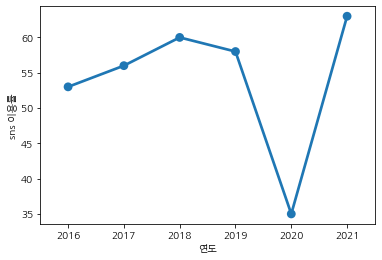

In [ ]:
sns.pointplot(data = mean_result3, x="연도", y="sns 이용률")

Text(0.5, 1.0, '연도별, 연령별 sns 이용률')

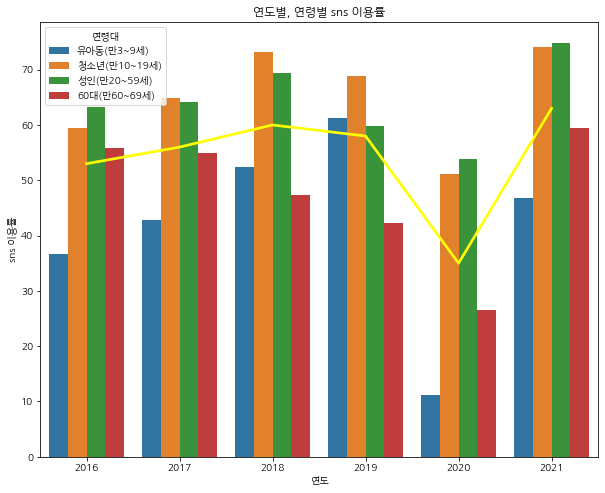

In [ ]:
plt.figure (figsize = (10,8))
sns.barplot(data = result, x="연도", y="sns 이용률", hue="연령대")
sns.pointplot(data = mean_result3, x="연도", y="sns 이용률", color = 'yellow')

plt.title('연도별, 연령별 sns 이용률')

60대 이상에서의 sns 이용률은 감소하고 있으며
평균 수치가 2020년에서 급락하는 것은 만 3~9세 및 60대 이상에서의 감소의 영향을 받았을 것으로 추정됨

In [ ]:
df_2016_final_nk = df_2016_final.copy()
df_2016_final_nk2 = df_2016_final_nk.drop([df_2016_final_nk.index[0], df_2016_final_nk.index[3]])
df_2016_final_nk2.loc['평균'] = df_2016_final_nk2.mean(axis=0)

df_2017_final_nk = df_2017_final.copy()
df_2017_final_nk2 = df_2017_final_nk.drop([df_2017_final_nk.index[0], df_2017_final_nk.index[3]])
df_2017_final_nk2.loc['평균'] = df_2017_final_nk2.mean(axis=0)

df_2018_final_nk = df_2018_final.copy()
df_2018_final_nk2 = df_2018_final_nk.drop([df_2018_final_nk.index[0], df_2018_final_nk.index[3]])
df_2018_final_nk2.loc['평균'] = df_2018_final_nk2.mean(axis=0)

df_2019_final_nk = df_2019_final.copy()
df_2019_final_nk2 = df_2019_final_nk.drop([df_2019_final_nk.index[0], df_2019_final_nk.index[3]])
df_2019_final_nk2.loc['평균'] = df_2019_final_nk2.mean(axis=0)

df_2020_final_nk = df_2020_final.copy()
df_2020_final_nk2 = df_2020_final_nk.drop([df_2020_final_nk.index[0], df_2020_final_nk.index[3]])
df_2020_final_nk2.loc['평균'] = df_2020_final_nk2.mean(axis=0)

df_2021_final_nk = df_2021_final.copy()
df_2021_final_nk2 = df_2021_final_nk.drop([df_2021_final_nk.index[0], df_2021_final_nk.index[3]])
df_2021_final_nk2.loc['평균'] = df_2021_final_nk2.mean(axis=0)

df_2020_final_nk2

<ipython-input-45-1af15d525139>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2016_final_nk2.loc['평균'] = df_2016_final_nk2.mean(axis=0)
<ipython-input-45-1af15d525139>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2017_final_nk2.loc['평균'] = df_2017_final_nk2.mean(axis=0)
<ipython-input-45-1af15d525139>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2018_final_nk2.loc['평균'] = df_2018_final_nk2.mean(axis=0)
<ipython-input-45-1af15d525139>:15: FutureWarning: Dropping of 

,연령대,sns 이용률,연도
3,청소년(만10~19세),51.21,2020.0
4,성인(만20~59세),53.77,2020.0
평균,NaN,52.49,2020.0


In [ ]:
df_2016_final_nk3 = df_2016_final_nk2.copy()
df_2016_final_nk3 = df_2016_final_nk2.drop([df_2016_final_nk2.index[0], df_2016_final_nk2.index[1]])

df_2017_final_nk3 = df_2017_final_nk2.copy()
df_2017_final_nk3 = df_2017_final_nk2.drop([df_2017_final_nk2.index[0], df_2017_final_nk2.index[1]])

df_2018_final_nk3 = df_2018_final_nk2.copy()
df_2018_final_nk3 = df_2018_final_nk2.drop([df_2018_final_nk2.index[0], df_2018_final_nk2.index[1]])

df_2019_final_nk3 = df_2019_final_nk2.copy()
df_2019_final_nk3 = df_2019_final_nk2.drop([df_2019_final_nk2.index[0], df_2019_final_nk2.index[1]])

df_2020_final_nk3 = df_2020_final_nk2.copy()
df_2020_final_nk3 = df_2020_final_nk2.drop([df_2020_final_nk2.index[0], df_2020_final_nk2.index[1]])

df_2021_final_nk3 = df_2021_final_nk2.copy()
df_2021_final_nk3 = df_2021_final_nk2.drop([df_2021_final_nk2.index[0], df_2021_final_nk2.index[1]])

df_2020_final_nk3

,연령대,sns 이용률,연도
평균,NaN,52.49,2020.0


In [ ]:
result_nk = pd.concat([df_2016_final_nk3, df_2017_final_nk3,
                      df_2018_final_nk3, df_2019_final_nk3,
                      df_2020_final_nk3, df_2021_final_nk3],
                     join = 'inner')
result_nk

,연령대,sns 이용률,연도
평균,NaN,61.350,2016.0
평균,NaN,64.590,2017.0
평균,NaN,71.340,2018.0
평균,NaN,64.340,2019.0
평균,NaN,52.490,2020.0
평균,NaN,74.485,2021.0


(35.0, 80.0)

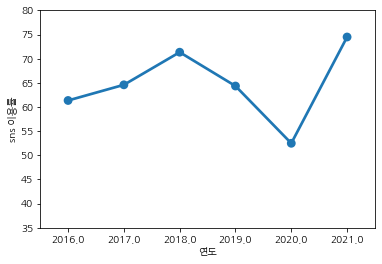

In [ ]:
sns.pointplot(data = result_nk, x="연도", y="sns 이용률")
plt.ylim([35,80])

만 3~9세 및 60대를 제외하고 평균값을 봤을 때 여전히 2020년에 감소하는 것을 볼 수 있으나,
2020년에서 2021년 사이에 급증한 점이 유의미하다고 생각한다. 


연도별, 나이대별로 독서 장애 요인 중 매체/콘텐츠 관련 분석
https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1015647&conn_path=I2

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_factor = pd.read_csv("/content/reading_factor.csv", encoding = "cp949")

In [ ]:
df_factor.head()

,통계분류(1),통계분류(2),2015,2015.1,2015.2,2015.3,2015.4,2015.5,2017,2017.1,...,2019.4,2019.5,2019.6,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,통계분류(1),통계분류(2),책 읽기가 싫고 습관이 들지 않았다,독서의 필요성 느끼지 못한다,다른 여가 활동을 즐기기 바쁨,일이 바빠서 시간 없음,몸이 불편하여 책읽기가 어려움,마음의여유가없기때문에,책 읽기가 싫고 습관이 들지 않았다,컴퓨터(인터넷) 때문에 시간이 없다,...,일이 바빠서 시간 없음,몸이 불편하여 책읽기가 어려움,마음의여유가없기때문에,일(학생은 공부) 때문에 시간이 없어서,책 이외의 매체/콘텐츠 이용,책 읽는 습관이 들지 않아서,시력 저하 등으로 글자가 잘 보이지 않아서,여가/취미 활동 (매체 /콘텐츠 이용 제외),책 읽는 것이 싫어서,책을 읽을 만한 마음의 여유가 없어서
1,전체,소계,23.2,5.9,12.2,34.6,4.1,12.9,12,19.6,...,27.7,3.4,5.4,26.5,26.2,9.7,9.5,6.7,6.6,4.7
2,성별,남성,22.2,5,12.4,38.1,3.3,12.6,11.1,20.9,...,30.1,2.8,5.3,28.1,26.1,9.6,7.2,7,7.7,4.7
3,성별,여성,24.1,6.9,12,31.1,4.8,13.3,12.8,18.3,...,25.3,4,5.4,24.9,26.3,9.7,11.7,6.4,5.6,4.7
4,연령별,19~29세,21.8,2.5,17.2,41.5,0.7,11.1,7.9,33.7,...,30.1,0.1,4.1,36.4,34.6,7.2,0.3,8.9,4,3.3


In [ ]:
df_factor.loc[0]

통계분류(1)                     통계분류(1)
통계분류(2)                     통계분류(2)
2015            책 읽기가 싫고 습관이 들지 않았다
2015.1              독서의 필요성 느끼지 못한다
2015.2             다른 여가 활동을 즐기기 바쁨
2015.3                 일이 바빠서 시간 없음
2015.4             몸이 불편하여 책읽기가 어려움
2015.5                  마음의여유가없기때문에
2017            책 읽기가 싫고 습관이 들지 않았다
2017.1          컴퓨터(인터넷) 때문에 시간이 없다
2017.2              독서의 필요성 느끼지 못한다
2017.3             다른 여가 활동을 즐기기 바쁨
2017.4                 일이 바빠서 시간 없음
2017.5             몸이 불편하여 책읽기가 어려움
2017.6                  마음의여유가없기때문에
2019                책 이외의 매체/콘텐츠 이용
2019.1          책 읽기가 싫고 습관이 들지 않았다
2019.2              독서의 필요성 느끼지 못한다
2019.3             다른 여가 활동을 즐기기 바쁨
2019.4                 일이 바빠서 시간 없음
2019.5             몸이 불편하여 책읽기가 어려움
2019.6                  마음의여유가없기때문에
2021          일(학생은 공부) 때문에 시간이 없어서
2021.1              책 이외의 매체/콘텐츠 이용
2021.2              책 읽는 습관이 들지 않아서
2021.3      시력 저하 등으로 글자가 잘 보이지 않아서
2021.4     여가/취미 활동 (매체 /콘텐츠 이용 제외)
2021.5                  책 읽는

In [ ]:
#매체, 콘텐츠 관련 응답만 뽑아내기
print((df_factor.loc[0] == "컴퓨터(인터넷) 때문에 시간이 없다") | (df_factor.loc[0] == "책 이외의 매체/콘텐츠 이용"))

통계분류(1)    False
통계분류(2)    False
2015       False
2015.1     False
2015.2     False
2015.3     False
2015.4     False
2015.5     False
2017       False
2017.1      True
2017.2     False
2017.3     False
2017.4     False
2017.5     False
2017.6     False
2019        True
2019.1     False
2019.2     False
2019.3     False
2019.4     False
2019.5     False
2019.6     False
2021       False
2021.1      True
2021.2     False
2021.3     False
2021.4     False
2021.5     False
2021.6     False
Name: 0, dtype: bool


In [ ]:
#매체, 콘텐츠 관련 응답만 df_media에 저장
df_media = df_factor[["통계분류(1)","통계분류(2)","2017.1", "2019", "2021.1"]]
df_media

,통계분류(1),통계분류(2),2017.1,2019,2021.1
0,통계분류(1),통계분류(2),컴퓨터(인터넷) 때문에 시간이 없다,책 이외의 매체/콘텐츠 이용,책 이외의 매체/콘텐츠 이용
1,전체,소계,19.6,29.1,26.2
2,성별,남성,20.9,28.6,26.1
3,성별,여성,18.3,29.6,26.3
4,연령별,19~29세,33.7,33.1,34.6
5,연령별,30~39세,27.6,29.4,32.7
6,연령별,40~49세,20.8,29.7,25.9
7,연령별,50~59세,14.1,29.2,24
8,연령별,60대 이상,6.9,25.8,19.3
9,연간독서량(종이책기준),없음,17.3,26.3,21.6


In [ ]:
#연도 이름 수정
df_media.rename(columns = {"2017.1":"2017"},inplace = True)
df_media.rename(columns = {"2021.1":"2021"},inplace = True)
df_media

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,통계분류(1),통계분류(2),2017,2019,2021
0,통계분류(1),통계분류(2),컴퓨터(인터넷) 때문에 시간이 없다,책 이외의 매체/콘텐츠 이용,책 이외의 매체/콘텐츠 이용
1,전체,소계,19.6,29.1,26.2
2,성별,남성,20.9,28.6,26.1
3,성별,여성,18.3,29.6,26.3
4,연령별,19~29세,33.7,33.1,34.6
5,연령별,30~39세,27.6,29.4,32.7
6,연령별,40~49세,20.8,29.7,25.9
7,연령별,50~59세,14.1,29.2,24
8,연령별,60대 이상,6.9,25.8,19.3
9,연간독서량(종이책기준),없음,17.3,26.3,21.6


In [ ]:

#연령별 분류만 모아서 df_media_age에 저장
df_media_age = df_media[df_media["통계분류(1)"] == "연령별"]
df_media_age.rename(columns = {"통계분류(1)":"분류"},inplace = True)
df_media_age.rename(columns = {"통계분류(2)":"연령대"},inplace = True)
df_media_age

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,분류,연령대,2017,2019,2021
4,연령별,19~29세,33.7,33.1,34.6
5,연령별,30~39세,27.6,29.4,32.7
6,연령별,40~49세,20.8,29.7,25.9
7,연령별,50~59세,14.1,29.2,24
8,연령별,60대 이상,6.9,25.8,19.3


In [ ]:
#시각화하기 위해 수치형으로 변환
df_media_age['2017'] = pd.to_numeric(df_media_age['2017'], errors='coerce')
df_media_age['2019'] = pd.to_numeric(df_media_age['2019'], errors='coerce')
df_media_age['2021'] = pd.to_numeric(df_media_age['2021'], errors='coerce')

<ipython-input-28-483543ce716d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_age['2017'] = pd.to_numeric(df_media_age['2017'], errors='coerce')
<ipython-input-28-483543ce716d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_age['2019'] = pd.to_numeric(df_media_age['2019'], errors='coerce')
<ipython-input-28-483543ce716d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:

#연령대별 pivot table 생성
df_pivot = df_media_age.pivot_table(index = "연령대")
df_pivot

,2017,2019,2021
연령대,,,
19~29세,33.7,33.1,34.6
30~39세,27.6,29.4,32.7
40~49세,20.8,29.7,25.9
50~59세,14.1,29.2,24.0
60대 이상,6.9,25.8,19.3


In [ ]:
#df_pivot을 연도에 따른 연령별 분포로 보기 위해 transpose
result = df_pivot.T

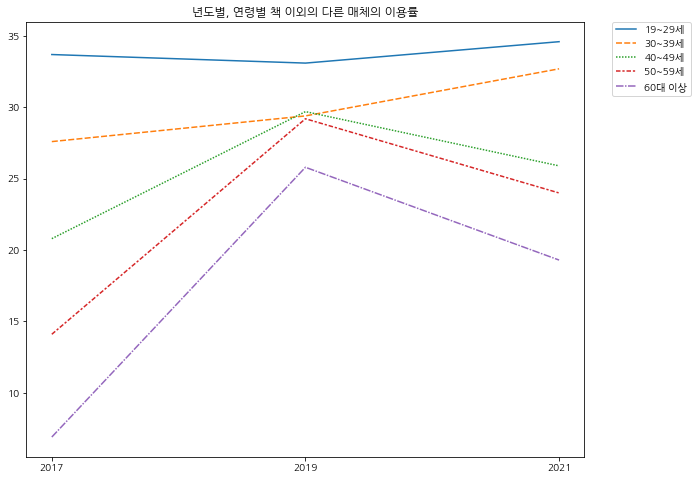

In [ ]:
#시각화
plt.figure(figsize=(10,8))
sns.lineplot(data = result)
plt.title('년도별, 연령별 책 이외의 다른 매체의 이용률')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

**2019-2021 사이에 20대와 30대를 제외한 다른 연령층의 다른 매체 이용률을 줄어들고 있는 것을 볼 수 있지만 이는 젊은 층의 매체이용률이 증가하고 있다는 결과를 가져온다.**